OUTPUT NATINYA
Kumpulan data ini berfungsi sebagai panduan komprehensif tentang kandungan nutrisi minuman Starbucks, menjadikannya sumber yang berharga bagi para peneliti, ahli diet, dan konsumen yang sadar kesehatan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('starbucks.csv')
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [3]:
df.shape

(242, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [7]:
df.duplicated().sum()

0

In [8]:
df['Total Fat (g)'] = df['Total Fat (g)'].str.rstrip('g').astype(float)

ValueError: could not convert string to float: '3 2'

In [9]:
df['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [10]:
#melakan aanalisis studi banding apakah benar dugaan awal angka 32 atau 3.3
df[(df['Total Fat (g)']=='3 2') | (df['Total Fat (g)']=='15') | (df['Total Fat (g)']=='3.5')]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75
18,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),Soymilk,110,3.5,1.0,0.0,0,55,19,2,13,6.0,6%,0%,15%,20%,85
29,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),2% Milk,130,3.5,1.5,0.1,15,80,18,0,17,6.0,10%,0%,20%,0%,75
48,Classic Espresso Drinks,Cappuccino,2% Milk,90,3.5,1.5,0.1,15,80,9,0,8,6.0,10%,0%,20%,0%,75
52,Classic Espresso Drinks,Cappuccino,Soymilk,100,3.5,0.4,0.0,0,80,9,1,5,7.0,8%,0%,25%,10%,150
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150
88,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),Soymilk,130,3.5,1.0,0.0,0,60,23,2,18,6.0,6%,0%,20%,20%,10
110,Tazo® Tea Drinks,Tazo® Chai Tea Latte,2% Milk,190,3.5,1.5,0.1,15,90,34,0,32,6.0,10%,0%,20%,2%,70
114,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Soymilk,220,3.5,0.4,0.0,0,90,41,1,37,6.0,8%,0%,25%,10%,95
138,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,170,3.5,0.4,0.0,0,80,27,1,25,6.0,8%,0%,25%,10.00%,varies


In [11]:
df.at[237, 'Total Fat (g)'] = '3.2'

In [12]:
df[(df['Total Fat (g)']=='3 2')]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)


In [13]:
df['Total Fat (g)'] = df['Total Fat (g)'].str.rstrip('g').astype(float)

In [14]:
df['Caffeine (mg)'] = df['Caffeine (mg)'].str.rstrip('mg').astype(float)

ValueError: could not convert string to float: 'Varies'

In [15]:
df[df['Caffeine (mg)']=='varies']

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
130,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Short Nonfat Milk,80,0.1,0.1,0.0,0,45,16,0,16,4.0,6%,0%,10%,0.00%,varies
131,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,90,2.0,1.0,0.1,10,50,15,0,15,3.0,6%,0%,10%,0.00%,varies
132,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,80,1.5,0.2,0.0,0,40,14,0,13,3.0,4%,0%,10%,6.00%,varies
133,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Tall Nonfat Milk,120,0.1,0.1,0.0,5,65,23,0,23,5.0,10%,0%,20%,0.00%,varies
134,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,140,3.0,1.5,0.1,15,75,23,0,23,5.0,8%,0%,15%,0.00%,varies
135,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,130,2.5,0.3,0.0,0,60,21,1,19,4.0,6%,0%,20%,8.00%,varies
136,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Grande Nonfat Milk,150,0.2,0.1,0.0,5,85,31,0,31,7.0,15%,0%,25%,0.00%,varies
137,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,190,4.0,2.0,0.1,15,95,31,0,30,7.0,10%,0%,25%,0.00%,varies
138,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,170,3.5,0.4,0.0,0,80,27,1,25,6.0,8%,0%,25%,10.00%,varies
139,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Venti Nonfat Milk,190,0.2,0.1,0.0,5,110,39,0,39,9.0,15%,0%,30%,0.00%,varies


In [16]:
df[df['Beverage_category'] == 'Tazo® Tea Drinks']

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
106,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Short Nonfat Milk,100,0.1,0.1,0.0,0,50,22,0,21,4.0,6%,0%,10%,0%,50
107,Tazo® Tea Drinks,Tazo® Chai Tea Latte,2% Milk,120,2.0,1.0,0.1,10,55,22,0,21,4.0,6%,0%,10%,0%,50
108,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Soymilk,110,1.5,0.2,0.0,0,45,20,0,18,3.0,4%,0%,10%,6%,50
109,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Tall Nonfat Milk,160,0.2,0.1,0.0,5,80,34,0,32,6.0,10%,0%,20%,2%,70
110,Tazo® Tea Drinks,Tazo® Chai Tea Latte,2% Milk,190,3.5,1.5,0.1,15,90,34,0,32,6.0,10%,0%,20%,2%,70
111,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Soymilk,160,2.5,0.3,0.0,0,70,31,1,28,5.0,6%,0%,20%,10%,70


In [17]:
#ada beberapa data yang mengalami kekosongan jalan salah satunya dengan menghapusnya indek 102-105
df.loc[102:105]
#df(index=range(102, 107))

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies


In [18]:
df = df.drop(index=range(102, 106))

In [19]:
df[df['Beverage_category'] == 'Tazo® Tea Drinks']

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
106,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Short Nonfat Milk,100,0.1,0.1,0.0,0,50,22,0,21,4.0,6%,0%,10%,0%,50
107,Tazo® Tea Drinks,Tazo® Chai Tea Latte,2% Milk,120,2.0,1.0,0.1,10,55,22,0,21,4.0,6%,0%,10%,0%,50
108,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Soymilk,110,1.5,0.2,0.0,0,45,20,0,18,3.0,4%,0%,10%,6%,50
109,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Tall Nonfat Milk,160,0.2,0.1,0.0,5,80,34,0,32,6.0,10%,0%,20%,2%,70
110,Tazo® Tea Drinks,Tazo® Chai Tea Latte,2% Milk,190,3.5,1.5,0.1,15,90,34,0,32,6.0,10%,0%,20%,2%,70
111,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Soymilk,160,2.5,0.3,0.0,0,70,31,1,28,5.0,6%,0%,20%,10%,70
112,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Grande Nonfat Milk,210,0.2,0.1,0.0,5,105,45,0,43,8.0,15%,0%,25%,2%,95
113,Tazo® Tea Drinks,Tazo® Chai Tea Latte,2% Milk,240,4.5,2.0,0.1,20,115,45,0,42,8.0,10%,0%,25%,2%,95
114,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Soymilk,220,3.5,0.4,0.0,0,90,41,1,37,6.0,8%,0%,25%,10%,95
115,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Venti Nonfat Milk,260,0.3,0.2,0.0,5,135,57,0,54,10.0,15%,0%,35%,2%,120


In [20]:
df.isnull().sum()

Beverage_category          0
Beverage                   0
Beverage_prep              0
Calories                   0
Total Fat (g)              0
Trans Fat (g)              0
Saturated Fat (g)          0
Sodium (mg)                0
Total Carbohydrates (g)    0
Cholesterol (mg)           0
Dietary Fibre (g)          0
Sugars (g)                 0
Protein (g)                0
Vitamin A (% DV)           0
Vitamin C (% DV)           0
Calcium (% DV)             0
Iron (% DV)                0
Caffeine (mg)              1
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        238 non-null    object 
 1   Beverage                 238 non-null    object 
 2   Beverage_prep            238 non-null    object 
 3   Calories                 238 non-null    int64  
 4   Total Fat (g)            238 non-null    float64
 5   Trans Fat (g)            238 non-null    float64
 6   Saturated Fat (g)        238 non-null    float64
 7   Sodium (mg)              238 non-null    int64  
 8   Total Carbohydrates (g)  238 non-null    int64  
 9   Cholesterol (mg)         238 non-null    int64  
 10  Dietary Fibre (g)        238 non-null    int64  
 11  Sugars (g)               238 non-null    int64  
 12  Protein (g)              238 non-null    float64
 13  Vitamin A (% DV)         238 non-null    object 
 14  Vitamin C (% DV)         2

In [22]:
df['Caffeine (mg)'] = df['Caffeine (mg)'].replace('varies', np.nan)

In [23]:
df[df['Beverage_category'] == 'Tazo® Tea Drinks']

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
106,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Short Nonfat Milk,100,0.1,0.1,0.0,0,50,22,0,21,4.0,6%,0%,10%,0%,50
107,Tazo® Tea Drinks,Tazo® Chai Tea Latte,2% Milk,120,2.0,1.0,0.1,10,55,22,0,21,4.0,6%,0%,10%,0%,50
108,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Soymilk,110,1.5,0.2,0.0,0,45,20,0,18,3.0,4%,0%,10%,6%,50
109,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Tall Nonfat Milk,160,0.2,0.1,0.0,5,80,34,0,32,6.0,10%,0%,20%,2%,70
110,Tazo® Tea Drinks,Tazo® Chai Tea Latte,2% Milk,190,3.5,1.5,0.1,15,90,34,0,32,6.0,10%,0%,20%,2%,70
111,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Soymilk,160,2.5,0.3,0.0,0,70,31,1,28,5.0,6%,0%,20%,10%,70
112,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Grande Nonfat Milk,210,0.2,0.1,0.0,5,105,45,0,43,8.0,15%,0%,25%,2%,95
113,Tazo® Tea Drinks,Tazo® Chai Tea Latte,2% Milk,240,4.5,2.0,0.1,20,115,45,0,42,8.0,10%,0%,25%,2%,95
114,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Soymilk,220,3.5,0.4,0.0,0,90,41,1,37,6.0,8%,0%,25%,10%,95
115,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Venti Nonfat Milk,260,0.3,0.2,0.0,5,135,57,0,54,10.0,15%,0%,35%,2%,120


In [24]:
#1
# Fill NaN values in 'Caffeine (mg)' with the mean of that column
mean_caffeine = df['Caffeine (mg)'].mean()
df['Caffeine (mg)'].fillna(mean_caffeine, inplace=True)


TypeError: can only concatenate str (not "int") to str

In [25]:
# Convert 'Caffeine (mg)' column to numeric type
df['Caffeine (mg)'] = pd.to_numeric(df['Caffeine (mg)'], errors='coerce')

In [26]:
#2
# Fill NaN values in 'Caffeine (mg)' with the mean of that column
mean_caffeine = df['Caffeine (mg)'].mean()
df['Caffeine (mg)'].fillna(mean_caffeine, inplace=True)

In [27]:
df[df['Beverage_category'] == 'Tazo® Tea Drinks']

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
106,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Short Nonfat Milk,100,0.1,0.1,0.0,0,50,22,0,21,4.0,6%,0%,10%,0%,50.000000
107,Tazo® Tea Drinks,Tazo® Chai Tea Latte,2% Milk,120,2.0,1.0,0.1,10,55,22,0,21,4.0,6%,0%,10%,0%,50.000000
108,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Soymilk,110,1.5,0.2,0.0,0,45,20,0,18,3.0,4%,0%,10%,6%,50.000000
109,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Tall Nonfat Milk,160,0.2,0.1,0.0,5,80,34,0,32,6.0,10%,0%,20%,2%,70.000000
110,Tazo® Tea Drinks,Tazo® Chai Tea Latte,2% Milk,190,3.5,1.5,0.1,15,90,34,0,32,6.0,10%,0%,20%,2%,70.000000
111,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Soymilk,160,2.5,0.3,0.0,0,70,31,1,28,5.0,6%,0%,20%,10%,70.000000
112,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Grande Nonfat Milk,210,0.2,0.1,0.0,5,105,45,0,43,8.0,15%,0%,25%,2%,95.000000
113,Tazo® Tea Drinks,Tazo® Chai Tea Latte,2% Milk,240,4.5,2.0,0.1,20,115,45,0,42,8.0,10%,0%,25%,2%,95.000000
114,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Soymilk,220,3.5,0.4,0.0,0,90,41,1,37,6.0,8%,0%,25%,10%,95.000000
115,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Venti Nonfat Milk,260,0.3,0.2,0.0,5,135,57,0,54,10.0,15%,0%,35%,2%,120.000000


In [28]:
percentage_columns = ['Iron (% DV)', 'Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)']
df[percentage_columns] = df[percentage_columns].replace('%', '', regex=True).astype(float) / 100

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        238 non-null    object 
 1   Beverage                 238 non-null    object 
 2   Beverage_prep            238 non-null    object 
 3   Calories                 238 non-null    int64  
 4   Total Fat (g)            238 non-null    float64
 5   Trans Fat (g)            238 non-null    float64
 6   Saturated Fat (g)        238 non-null    float64
 7   Sodium (mg)              238 non-null    int64  
 8   Total Carbohydrates (g)  238 non-null    int64  
 9   Cholesterol (mg)         238 non-null    int64  
 10  Dietary Fibre (g)        238 non-null    int64  
 11  Sugars (g)               238 non-null    int64  
 12  Protein (g)              238 non-null    float64
 13  Vitamin A (% DV)         238 non-null    float64
 14  Vitamin C (% DV)         2

# Permasalahan sudah clear

In [30]:
df.describe()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,197.130252,2.953782,1.328992,0.038235,6.470588,131.050420,36.596639,0.819328,33.516807,7.095798,0.099958,0.037101,0.211050,0.075714,89.520548
std,100.570419,2.944631,1.645156,0.071808,8.662761,81.259323,20.433000,1.454269,19.421750,4.826787,0.080638,0.145351,0.144103,0.105295,62.078100
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.200000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,19.000000,3.000000,0.040000,0.000000,0.100000,0.000000,66.250000
50%,190.000000,2.500000,0.500000,0.000000,5.000000,125.000000,35.000000,0.000000,32.000000,6.000000,0.080000,0.000000,0.200000,0.020000,89.520548
75%,260.000000,4.500000,2.000000,0.100000,10.000000,177.500000,51.000000,1.000000,44.000000,10.000000,0.150000,0.000000,0.300000,0.100000,130.000000
max,510.000000,15.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000,0.500000,1.000000,0.600000,0.500000,410.000000


# ANALIS DATA


<AxesSubplot: >

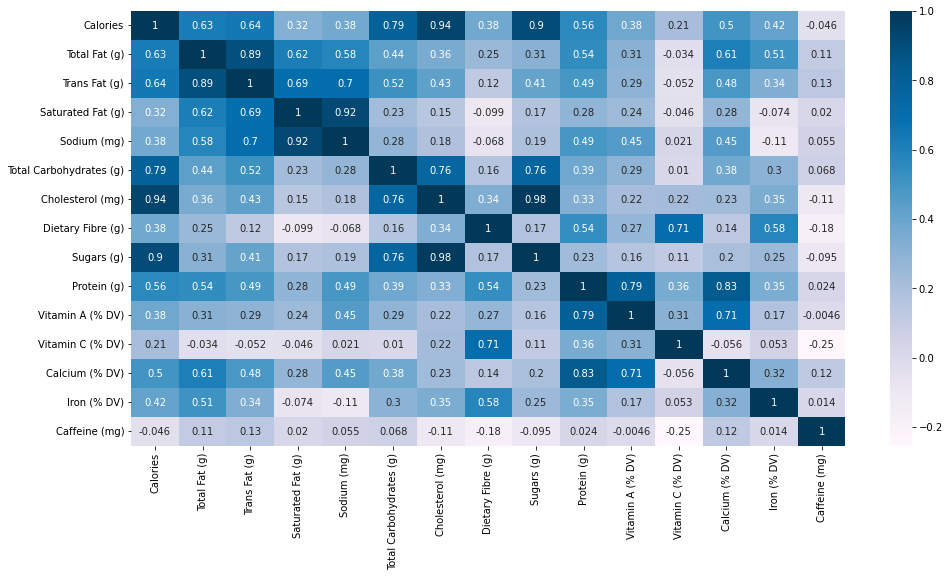

In [31]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap='PuBu')

array([[<AxesSubplot: title={'center': 'Calories'}>,
        <AxesSubplot: title={'center': 'Total Fat (g)'}>,
        <AxesSubplot: title={'center': 'Trans Fat (g)'}>,
        <AxesSubplot: title={'center': 'Saturated Fat (g)'}>],
       [<AxesSubplot: title={'center': 'Sodium (mg)'}>,
        <AxesSubplot: title={'center': 'Total Carbohydrates (g)'}>,
        <AxesSubplot: title={'center': 'Cholesterol (mg)'}>,
        <AxesSubplot: title={'center': 'Dietary Fibre (g)'}>],
       [<AxesSubplot: title={'center': 'Sugars (g)'}>,
        <AxesSubplot: title={'center': 'Protein (g)'}>,
        <AxesSubplot: title={'center': 'Vitamin A (% DV)'}>,
        <AxesSubplot: title={'center': 'Vitamin C (% DV)'}>],
       [<AxesSubplot: title={'center': 'Calcium (% DV)'}>,
        <AxesSubplot: title={'center': 'Iron (% DV)'}>,
        <AxesSubplot: title={'center': 'Caffeine (mg)'}>,
        <AxesSubplot: >]], dtype=object)

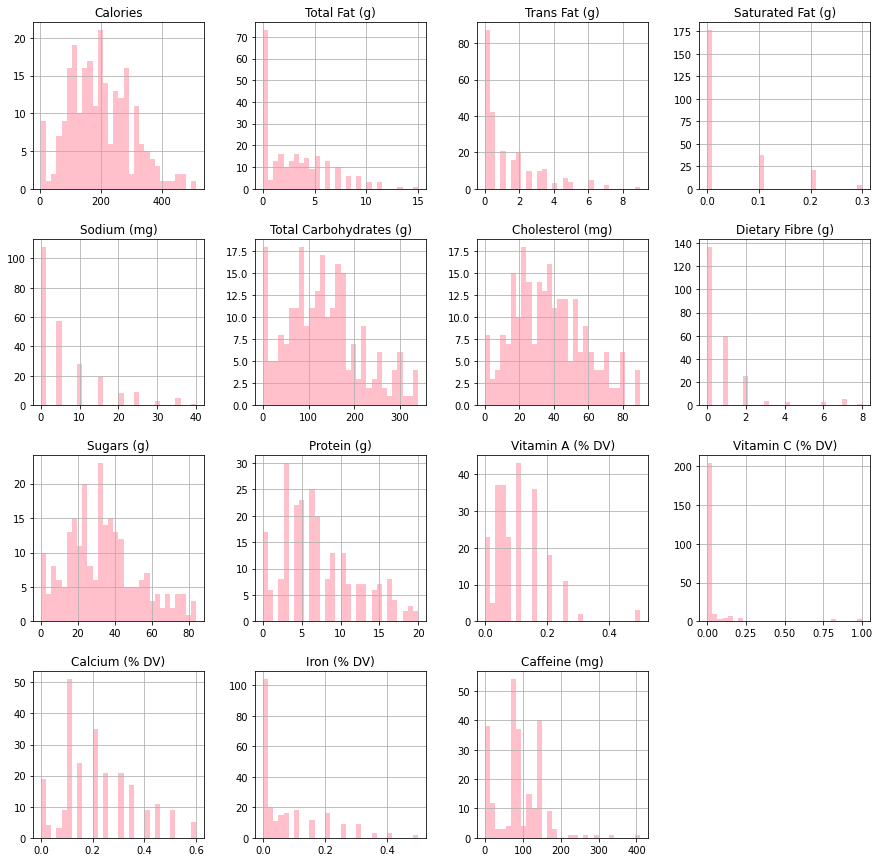

In [32]:
df.hist(figsize=(15,15), bins=30, color='pink')

In [33]:
df.head(2)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.0,0.0,0.0,0.0,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.0,0.0,0.0,0.0,260.0


In [34]:
df[['Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)']].max()

Vitamin A (% DV)    0.5
Vitamin C (% DV)    1.0
Calcium (% DV)      0.6
Iron (% DV)         0.5
dtype: float64

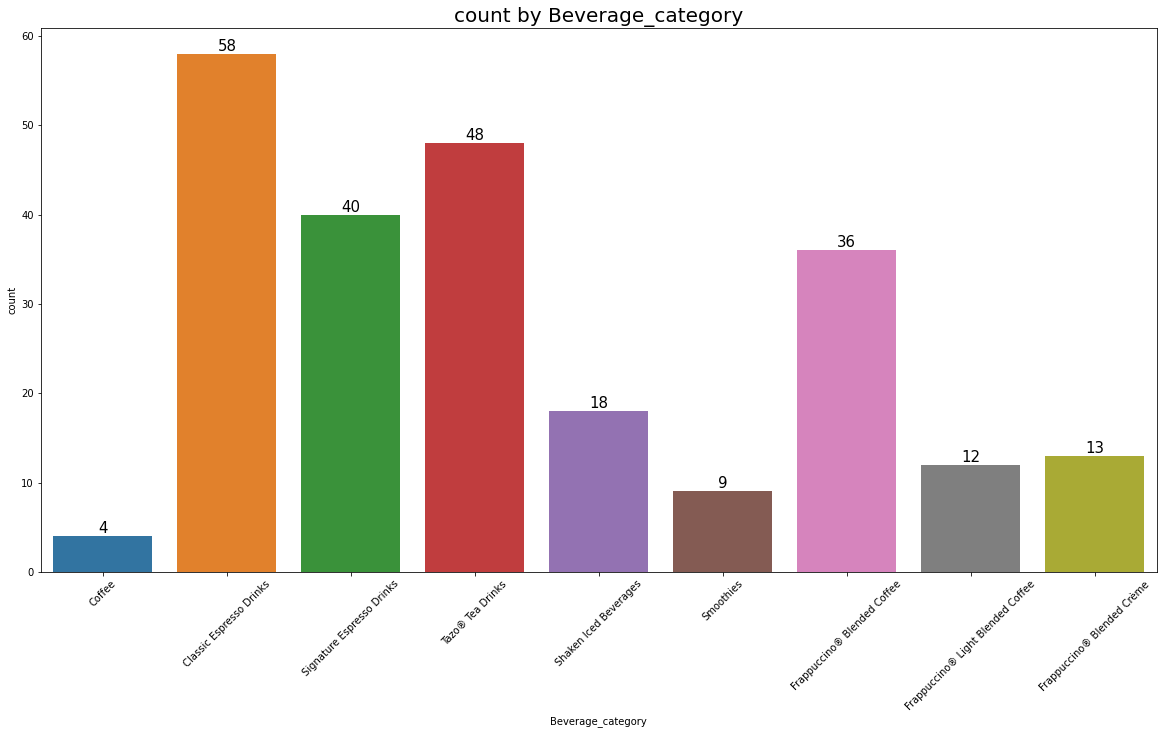

In [35]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x=df['Beverage_category'])
ax.bar_label(ax.containers[0], fontsize=15)
plt.title('count by Beverage_category', fontsize=20)
plt.xticks(rotation=45)
plt.show()


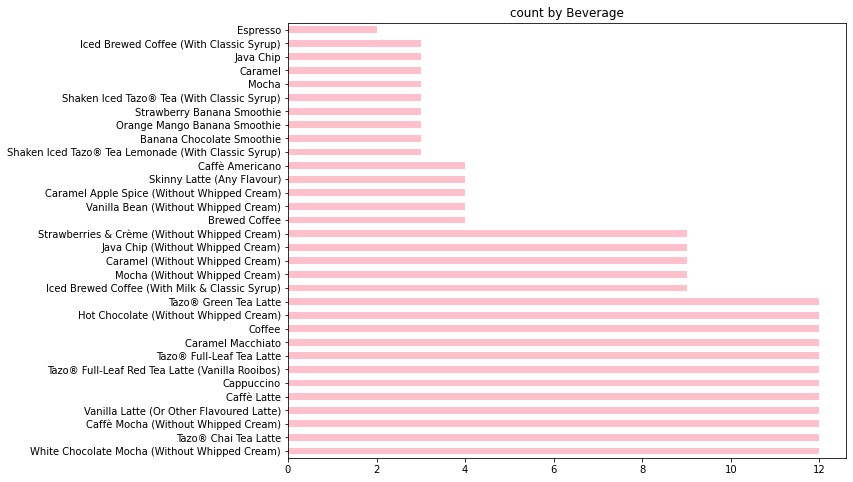

In [36]:
plt.figure(figsize=(10,8))
df.Beverage.value_counts().plot(kind='barh', color='pink')
plt.title('count by Beverage')
plt.show()

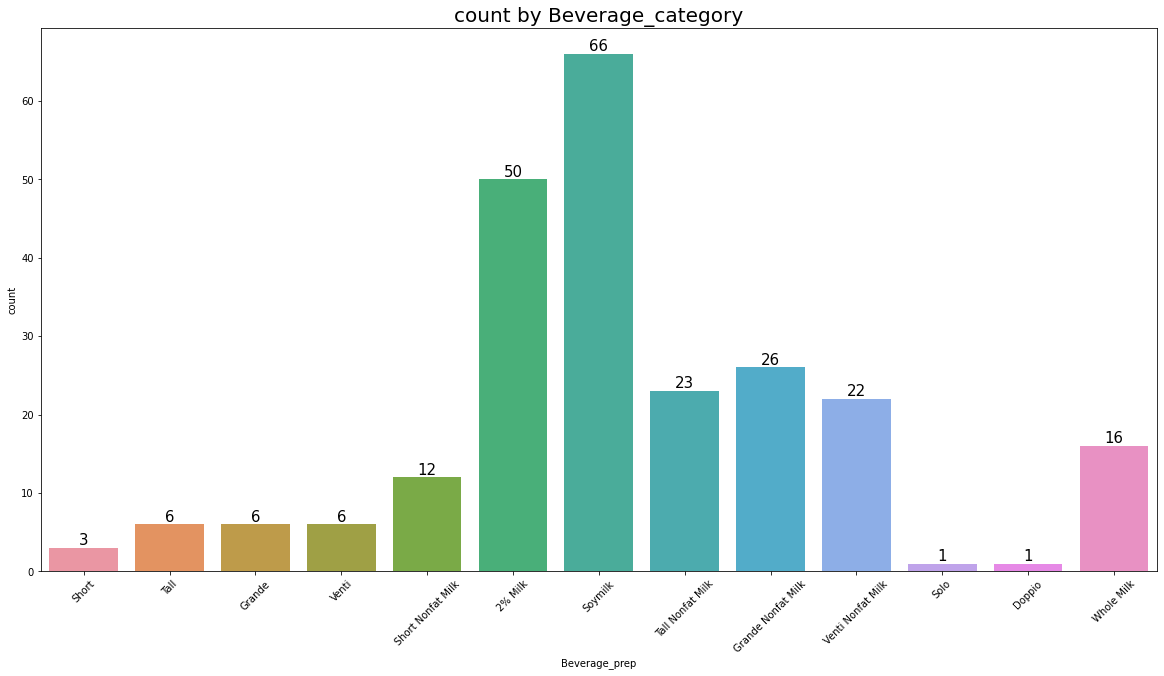

In [37]:
#
plt.figure(figsize=(20,10))
ax=sns.countplot(x=df['Beverage_prep'])
ax.bar_label(ax.containers[0], fontsize=15)
plt.title('count by Beverage_category', fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [38]:
#plt.figure(figsize=(20,10))
#ax = sns.countplot(data = df, x='Beverage_prep', hue = 'Beverage_category')
# Adding labels to each bar
#for container in ax.containers:
#    ax.bar_label(container, fmt='%d', label_type='edge')
#plt.xticks(rotation=45)
#plt.show() 

In [39]:
df.groupby('Beverage_category')['Beverage_prep'].value_counts(ascending=False)

Beverage_category                  Beverage_prep     
Classic Espresso Drinks            2% Milk               16
                                   Soymilk               16
                                   Grande Nonfat Milk     5
                                   Short Nonfat Milk      5
                                   Tall Nonfat Milk       5
                                   Venti Nonfat Milk      5
                                   Doppio                 1
                                   Grande                 1
                                   Short                  1
                                   Solo                   1
                                   Tall                   1
                                   Venti                  1
Coffee                             Grande                 1
                                   Short                  1
                                   Tall                   1
                                   Venti      

In [40]:
df.groupby('Beverage_category')['Beverage'].value_counts(ascending=False)

Beverage_category                  Beverage                                           
Classic Espresso Drinks            Caffè Latte                                            12
                                   Caffè Mocha (Without Whipped Cream)                    12
                                   Cappuccino                                             12
                                   Vanilla Latte (Or Other Flavoured Latte)               12
                                   Caffè Americano                                         4
                                   Skinny Latte (Any Flavour)                              4
                                   Espresso                                                2
Coffee                             Brewed Coffee                                           4
Frappuccino® Blended Coffee        Caramel (Without Whipped Cream)                         9
                                   Coffee                                   

In [41]:
#mencari nilai tertinggi 
high = df[['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)', 'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)', 'Sugars (g)',  'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)']].max()
high

Calories                   510.0
Total Fat (g)               15.0
Trans Fat (g)                9.0
Saturated Fat (g)            0.3
Sodium (mg)                 40.0
Total Carbohydrates (g)    340.0
Cholesterol (mg)            90.0
Dietary Fibre (g)            8.0
Sugars (g)                  84.0
Protein (g)                 20.0
Vitamin A (% DV)             0.5
Vitamin C (% DV)             1.0
Calcium (% DV)               0.6
Iron (% DV)                  0.5
Caffeine (mg)              410.0
dtype: float64

In [42]:
#mencari paling tinggi calori #tinggi lemak #tinggi Trans Fat
df_T1 = df[(df['Calories']==510.0) | (df['Total Fat (g)']==15.0) | (df['Trans Fat (g)']==9.0) | (df['Saturated Fat (g)']==0.3)]
df_T1.sort_values(by='Calories', ascending = False)

def highlight_cells(val, col):
    color = 'background-color: lightgreen' if (
        (col == 'Calories' and val == 510.0) or
        (col == 'Total Fat (g)' and val == 15.0) or
        (col == 'Trans Fat (g)' and val == 9.0) or
        (col == 'Saturated Fat (g)' and val == 0.3)
    ) else ''
    return color

# Apply the style to the DataFrame by column
styled_df = df_T1.style.apply(lambda x: [highlight_cells(v, x.name) for v in x], subset=df.columns[1:])

# Display the styled DataFrame
styled_df


,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
14,Classic Espresso Drinks,Caffè Latte,2% Milk,240,9.000000,4.500000,0.300000,35,220,24,0,22,16.000000,0.250000,0.020000,0.500000,0.000000,150.000000
38,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),2% Milk,320,9.000000,4.500000,0.300000,35,200,46,0,44,15.000000,0.250000,0.020000,0.450000,0.000000,150.000000
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15.000000,9.000000,0.200000,35,330,77,0,74,19.000000,0.200000,0.040000,0.600000,0.020000,150.000000
96,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),2% Milk,380,11.000000,6.000000,0.300000,35,200,63,2,54,17.000000,0.250000,0.020000,0.500000,0.300000,30.000000
128,Tazo® Tea Drinks,Tazo® Green Tea Latte,2% Milk,450,10.000000,5.000000,0.300000,40,230,72,2,71,17.000000,0.250000,0.200000,0.500000,0.060000,110.000000


In [43]:
df_T2 = df[(df['Sodium (mg)']==40.0) | (df['Total Carbohydrates (g)']==340.0) | (df['Cholesterol (mg)']==90.0) | (df['Dietary Fibre (g)']==8.0)]
df_T2.sort_values(by='Sodium (mg)', ascending=False) 

def highlight_cells(val, col):
    color = 'background-color: lightgreen' if (
        (col == 'Sodium (mg)' and val == 40.0) or
        (col == 'Total Carbohydrates (g)' and val == 340.0) or
        (col == 'Cholesterol (mg)' and val == 90.0) or
        (col == 'Dietary Fibre (g)' and val == 8.0)
    ) else ''
    return color

# Apply the style to the DataFrame by column
styled_df = df_T2.style.apply(lambda x: [highlight_cells(v, x.name) for v in x], subset=df.columns[1:])

# Display the styled DataFrame
styled_df


,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
128,Tazo® Tea Drinks,Tazo® Green Tea Latte,2% Milk,450,10.000000,5.000000,0.300000,40,230,72,2,71,17.000000,0.250000,0.200000,0.500000,0.060000,110.000000
180,Smoothies,Strawberry Banana Smoothie,Soymilk,290,2.000000,0.400000,0.000000,5,120,58,8,40,16.000000,0.020000,1.000000,0.100000,0.080000,0.000000
214,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5.000000,4.000000,0.000000,5,340,90,2,84,7.000000,0.100000,0.000000,0.200000,0.350000,145.000000
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10.000000,7.000000,0.200000,15,340,90,2,84,7.000000,0.060000,0.000000,0.150000,0.350000,145.000000


In [44]:
df_T3 = df[(df['Sugars (g)']==84.0) | (df['Protein (g)']==20.0)]
df_T3.sort_values(by='Sugars (g)', ascending=False)

def highlight_cells(val, col):
    color = 'background-color: lightgreen' if (
        (col == 'Sugars (g)' and val == 84.0) or
        (col == 'Protein (g)' and val == 20.0) 
    ) else ''
    return color

# Apply the style to the DataFrame by column
styled_df = df_T3.style.apply(lambda x: [highlight_cells(v, x.name) for v in x], subset=df.columns[1:])

# Display the styled DataFrame
styled_df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
172,Smoothies,Banana Chocolate Smoothie,Grande Nonfat Milk,280,2.500000,1.500000,0.000000,5,150,53,7,34,20.000000,0.100000,0.150000,0.200000,0.000000,89.520548
173,Smoothies,Banana Chocolate Smoothie,2% Milk,300,5.000000,2.500000,0.100000,15,160,53,7,34,20.000000,0.080000,0.150000,0.200000,0.200000,15.000000
214,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5.000000,4.000000,0.000000,5,340,90,2,84,7.000000,0.100000,0.000000,0.200000,0.350000,145.000000
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10.000000,7.000000,0.200000,15,340,90,2,84,7.000000,0.060000,0.000000,0.150000,0.350000,145.000000


In [45]:
df_t4 = df[(df['Vitamin A (% DV)']==0.5) | (df['Vitamin C (% DV)']==1.0) | (df['Calcium (% DV)']==0.6) | (df['Iron (% DV)']==0.5) | (df['Caffeine (mg)']==410.0)]
df_t4.sort_values(by='Vitamin A (% DV)', ascending = False)

def highlight_cells(val, col):
    color = 'background-color: lightgreen' if (
        (col == 'Vitamin A (% DV)' and val == 0.5) or
        (col == 'Vitamin C (% DV)' and val == 1.0) or 
        (col == 'Calcium (% DV)' and val == 0.6) or
        (col == 'Iron (% DV)' and val == 0.5) or
        (col == 'Caffeine (mg)' and val == 410.0)
    ) else ''
    return color

# Apply the style to the DataFrame by column
styled_df = df_t4.style.apply(lambda x: [highlight_cells(v, x.name) for v in x], subset=df.columns[1:])

# Display the styled DataFrame
styled_df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
3,Coffee,Brewed Coffee,Venti,5,0.100000,0.000000,0.000000,0,10,0,0,0,1.000000,0.000000,0.000000,0.020000,0.000000,410.000000
27,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),Soymilk,290,9.000000,2.500000,0.000000,0,140,47,4,33,14.000000,0.150000,0.000000,0.450000,0.500000,180.000000
83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Venti Nonfat Milk,450,7.000000,6.000000,0.000000,10,310,78,0,74,19.000000,0.250000,0.020000,0.600000,0.020000,150.000000
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15.000000,9.000000,0.200000,35,330,77,0,74,19.000000,0.200000,0.040000,0.600000,0.020000,150.000000
85,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,460,13.000000,6.000000,0.000000,5,290,70,1,64,16.000000,0.150000,0.020000,0.600000,0.200000,150.000000
97,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),Soymilk,330,9.000000,2.500000,0.000000,0,160,55,4,44,15.000000,0.150000,0.000000,0.500000,0.500000,30.000000
127,Tazo® Tea Drinks,Tazo® Green Tea Latte,Venti Nonfat Milk,370,0.500000,0.300000,0.000000,10,200,73,2,71,18.000000,0.300000,0.200000,0.600000,0.060000,110.000000
129,Tazo® Tea Drinks,Tazo® Green Tea Latte,Soymilk,390,8.000000,1.000000,0.000000,0,180,64,4,58,14.000000,0.200000,0.200000,0.600000,0.300000,110.000000
175,Smoothies,Orange Mango Banana Smoothie,Grande Nonfat Milk,260,1.000000,0.300000,0.000000,5,120,54,6,37,16.000000,0.500000,0.800000,0.100000,0.300000,15.000000
176,Smoothies,Orange Mango Banana Smoothie,2% Milk,270,1.500000,0.500000,0.000000,5,125,53,6,37,16.000000,0.500000,0.800000,0.100000,0.060000,0.000000


In [46]:
#pengabungan kualyti tertinggi
dfnew = pd.concat([df_T1, df_T2, df_T3, df_t4], ignore_index=True)

In [47]:
dfnew

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Classic Espresso Drinks,Caffè Latte,2% Milk,240,9.0,4.5,0.3,35,220,24,0,22,16.0,0.25,0.02,0.50,0.00,150.000000
1,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),2% Milk,320,9.0,4.5,0.3,35,200,46,0,44,15.0,0.25,0.02,0.45,0.00,150.000000
2,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15.0,9.0,0.2,35,330,77,0,74,19.0,0.20,0.04,0.60,0.02,150.000000
3,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),2% Milk,380,11.0,6.0,0.3,35,200,63,2,54,17.0,0.25,0.02,0.50,0.30,30.000000
4,Tazo® Tea Drinks,Tazo® Green Tea Latte,2% Milk,450,10.0,5.0,0.3,40,230,72,2,71,17.0,0.25,0.20,0.50,0.06,110.000000
5,Tazo® Tea Drinks,Tazo® Green Tea Latte,2% Milk,450,10.0,5.0,0.3,40,230,72,2,71,17.0,0.25,0.20,0.50,0.06,110.000000
6,Smoothies,Strawberry Banana Smoothie,Soymilk,290,2.0,0.4,0.0,5,120,58,8,40,16.0,0.02,1.00,0.10,0.08,0.000000
7,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5.0,4.0,0.0,5,340,90,2,84,7.0,0.10,0.00,0.20,0.35,145.000000
8,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10.0,7.0,0.2,15,340,90,2,84,7.0,0.06,0.00,0.15,0.35,145.000000
9,Smoothies,Banana Chocolate Smoothie,Grande Nonfat Milk,280,2.5,1.5,0.0,5,150,53,7,34,20.0,0.10,0.15,0.20,0.00,89.520548


In [48]:
df.shape

(238, 18)

In [49]:
dfnew.shape

(27, 18)

In [50]:
# Menggabungkan df_1 dan df_2
merged_df = pd.merge(df, dfnew, how='outer', indicator=True)

# Menyaring baris yang hanya terdapat pada df_1
result_df = merged_df.query("_merge == 'left_only'").drop(columns=['_merge'])

# Menampilkan hasil pengurangan
print("hasil df dikurangi dfnew")
result_df

hasil df dikurangi dfnew


,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.00,0.00,0.00,0.00,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.00,0.00,0.00,0.00,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.00,0.00,0.00,0.00,330.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,0.10,0.00,0.20,0.00,75.0
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,0.10,0.00,0.20,0.00,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3.2,0.4,0.0,0,250,67,1,64,5.0,0.06,0.08,0.20,0.10,0.0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,0.06,0.00,0.10,0.00,0.0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,0.06,0.00,0.10,0.00,0.0
241,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,0.04,0.00,0.10,0.06,0.0


In [51]:
#mencari nilai tertinggi 
result_df[['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)', 'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)', 'Sugars (g)',  'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)']].max()

Calories                   430.0
Total Fat (g)               11.0
Trans Fat (g)                7.0
Saturated Fat (g)            0.2
Sodium (mg)                 35.0
Total Carbohydrates (g)    330.0
Cholesterol (mg)            89.0
Dietary Fibre (g)            7.0
Sugars (g)                  83.0
Protein (g)                 19.0
Vitamin A (% DV)             0.3
Vitamin C (% DV)             0.2
Calcium (% DV)               0.5
Iron (% DV)                  0.4
Caffeine (mg)              330.0
dtype: float64

In [52]:
high

Calories                   510.0
Total Fat (g)               15.0
Trans Fat (g)                9.0
Saturated Fat (g)            0.3
Sodium (mg)                 40.0
Total Carbohydrates (g)    340.0
Cholesterol (mg)            90.0
Dietary Fibre (g)            8.0
Sugars (g)                  84.0
Protein (g)                 20.0
Vitamin A (% DV)             0.5
Vitamin C (% DV)             1.0
Calcium (% DV)               0.6
Iron (% DV)                  0.5
Caffeine (mg)              410.0
dtype: float64